# Predicting Road Accident Risk

In [2]:
# importing Required Libraries and Load Data set

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

IMPORTING DATASET

In [3]:
# importing the data set
try:
    df = pd.read_csv("Raw_Data/train.csv")
except:
    df = pd.read_csv("train.csv")

# display the first five row of the dataframe
df.head()


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


EXPLORATORY DATA ANALYSIS

In [4]:
# display the shape of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [5]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
boolean_cols = df.select_dtypes(include=["bool"]).columns

print("Numerical:", numerical_cols)
print("Categorical:", categorical_cols)
print("Boolean:", boolean_cols)
print("shape of the dataframe:", df.shape)

Numerical: Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents',
       'accident_risk'],
      dtype='object')
Categorical: Index(['road_type', 'lighting', 'weather', 'time_of_day'], dtype='object')
Boolean: Index(['road_signs_present', 'public_road', 'holiday', 'school_season'], dtype='object')
shape of the dataframe: (517754, 14)


In [6]:
# df[[numerical_cols]].describe()

df[[
    "num_lanes",
    "curvature",
    "speed_limit",
    "num_reported_accidents",
    "accident_risk"
]].describe()


,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,2.491511,0.488719,46.112575,1.187970,0.352377
std,1.120434,0.272563,15.788521,0.895961,0.166417
min,1.000000,0.000000,25.000000,0.000000,0.000000
25%,1.000000,0.260000,35.000000,1.000000,0.230000
50%,2.000000,0.510000,45.000000,1.000000,0.340000
75%,3.000000,0.710000,60.000000,2.000000,0.460000
max,4.000000,1.000000,70.000000,7.000000,1.000000


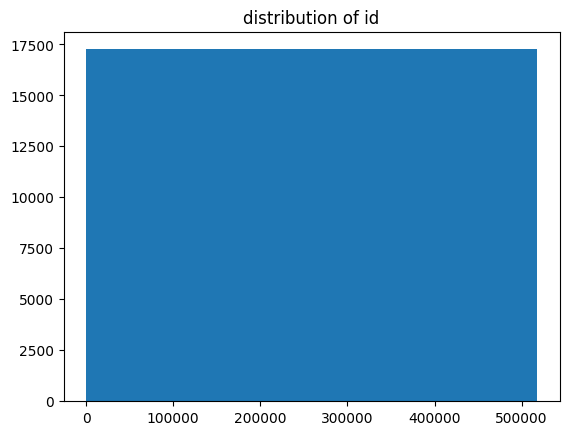

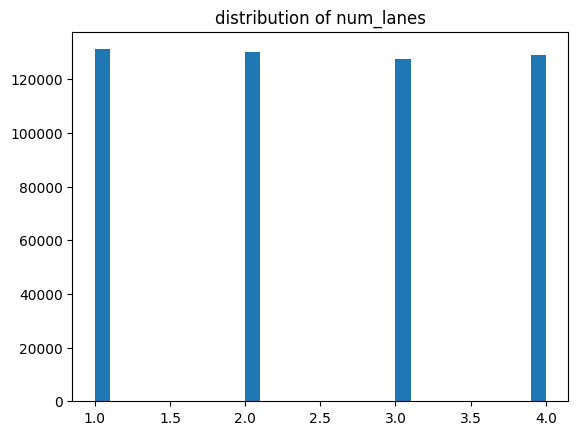

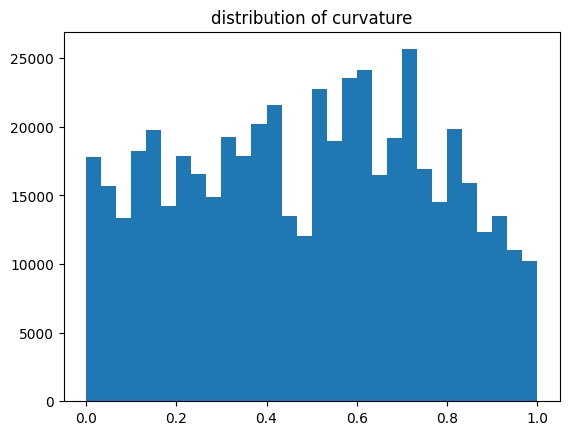

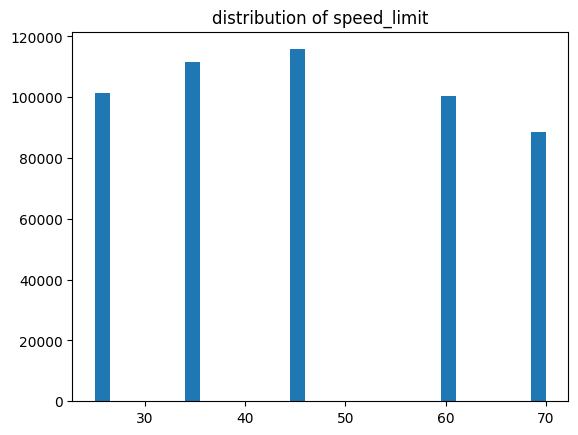

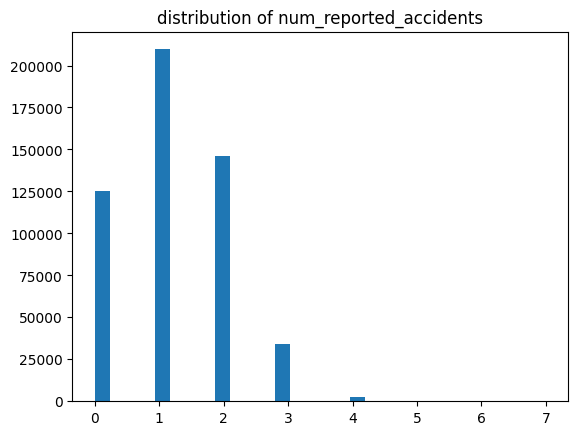

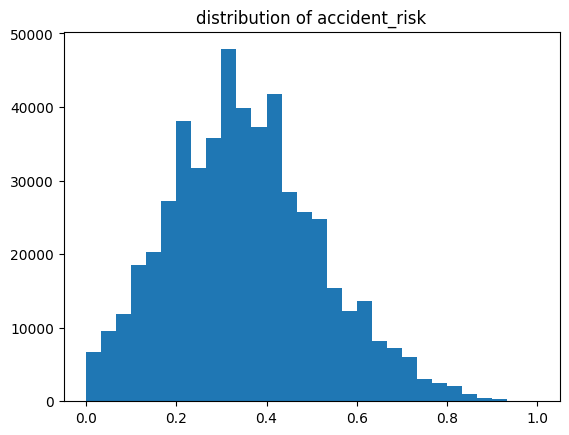

In [ ]:
# univariate analysis - histograms for numerical columns
for col in numerical_cols:
    plt.Figure(figsize=(5, 3))
    plt.hist(df[col], bins=30)
    plt.title(f"distribution of {col}")
    plt.show()

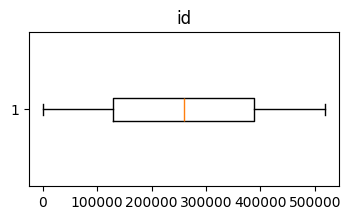

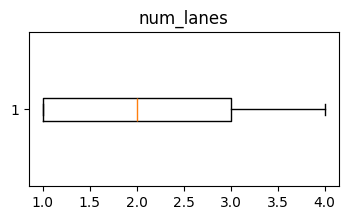

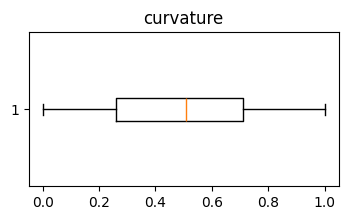

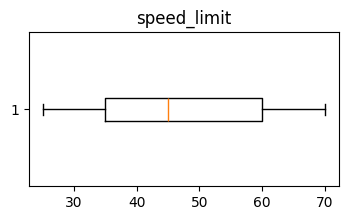

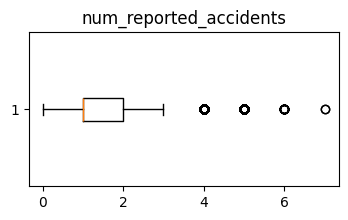

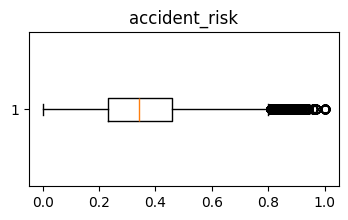

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(4,2))
    plt.boxplot(df[col], vert=False)
    plt.title(col)
    plt.show()


In [ ]:
# univariate analysis of categorical columns
for col in categorical_cols:
    print(df[col].value_counts())
    print("-" * 40)

road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64
----------------------------------------
lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64
----------------------------------------
weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64
----------------------------------------
time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64
----------------------------------------


In [ ]:
for col in categorical_cols:
    print(df[col].value_counts(normalize=True) * 100)
    print("-" * 40)


road_type
highway    33.543343
rural      33.359279
urban      33.097378
Name: proportion, dtype: float64
----------------------------------------
lighting
dim         35.504506
daylight    34.382158
night       30.113336
Name: proportion, dtype: float64
----------------------------------------
weather
foggy    35.048112
clear    34.631505
rainy    30.320384
Name: proportion, dtype: float64
----------------------------------------
time_of_day
morning      33.492740
evening      33.382069
afternoon    33.125191
Name: proportion, dtype: float64
----------------------------------------


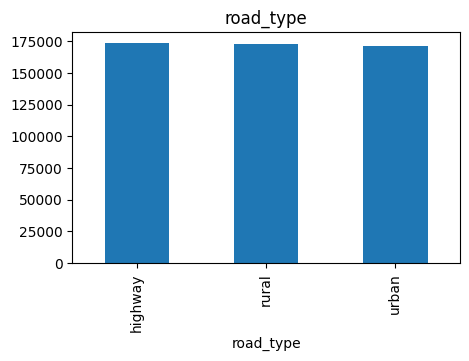

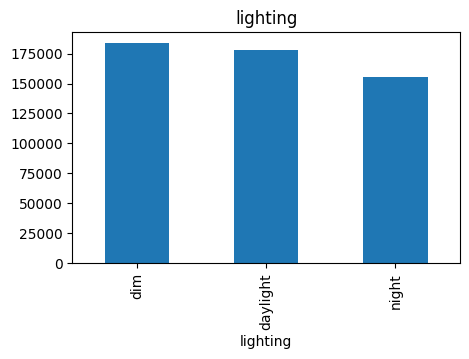

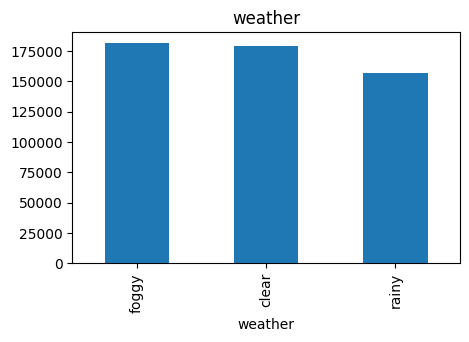

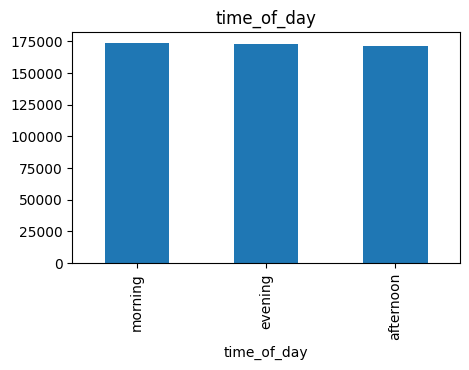

In [ ]:
# univariate analysis - bar plots for categorical columns
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', figsize=(5,3))
    plt.title(col)
    plt.show()

In [ ]:
# univariate analysis of target variable accident risk
df['accident_risk'].value_counts(normalize=True) * 100


accident_risk
0.34    3.001812
0.32    2.750341
0.37    2.598338
0.28    2.566277
0.39    2.414081
          ...   
0.94    0.009078
0.97    0.005408
0.96    0.005408
0.90    0.005022
0.93    0.004442
Name: proportion, Length: 98, dtype: float64

Summary Statistics for 'accident_risk':
count    517754.000000
mean          0.352377
std           0.166417
min           0.000000
25%           0.230000
50%           0.340000
75%           0.460000
max           1.000000
Name: accident_risk, dtype: float64

Percentage of records per risk range:
accident_risk
(-0.001, 0.1]     5.551285
(0.1, 0.2]       14.078307
(0.2, 0.3]       21.092063
(0.3, 0.4]       24.091943
(0.4, 0.5]       17.577073
(0.5, 0.6]        9.723923
(0.6, 0.7]        5.126180
(0.7, 0.8]        2.108917
(0.8, 0.9]        0.560691
(0.9, 1.0]        0.089618
Name: proportion, dtype: float64


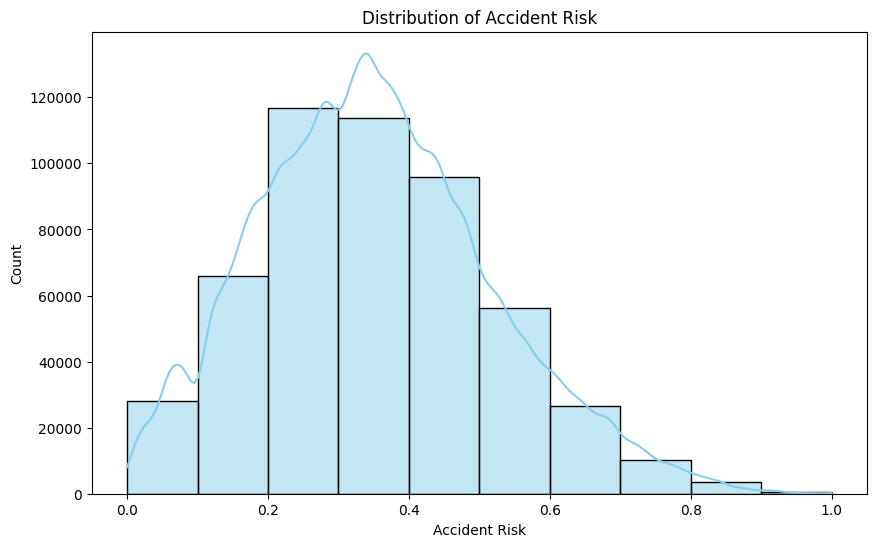

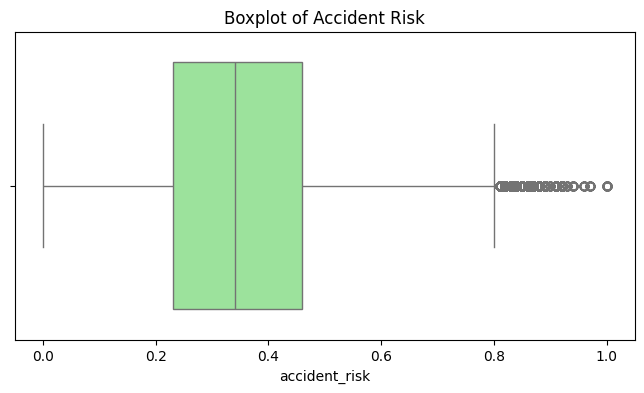

In [ ]:
# univariate analysis of target variable "accident risk"
# Summary statistics
print("Summary Statistics for 'accident_risk':")
print(df['accident_risk'].describe())

# Distribution in bins (percentages)
# Bin into 10 intervals
risk_bins = pd.cut(df['accident_risk'], bins=10)
risk_distribution = risk_bins.value_counts(normalize=True) * 100
print("\nPercentage of records per risk range:")
print(risk_distribution.sort_index())

# Histogram (visual distribution)
plt.figure(figsize=(10,6))
sns.histplot(df['accident_risk'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Accident Risk')
plt.xlabel('Accident Risk')
plt.ylabel('Count')
plt.show()

# Boxplot (to check outliers)
plt.figure(figsize=(8,4))
sns.boxplot(x=df['accident_risk'], color='lightgreen')
plt.title('Boxplot of Accident Risk')
plt.show()


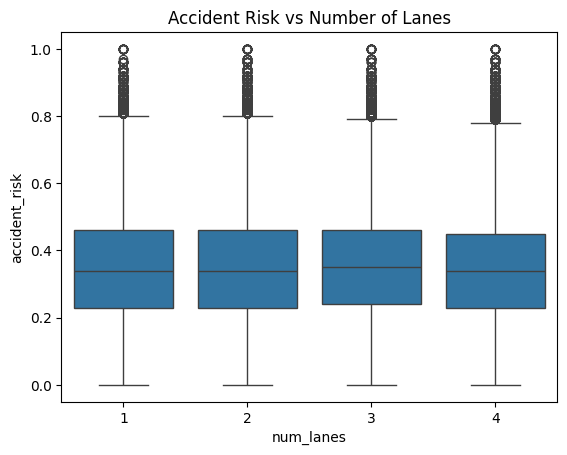

In [12]:

target == "accident_risk"

sns.boxplot(x="num_lanes", y=target, data=df)
plt.title("Accident Risk vs Number of Lanes")
plt.show()


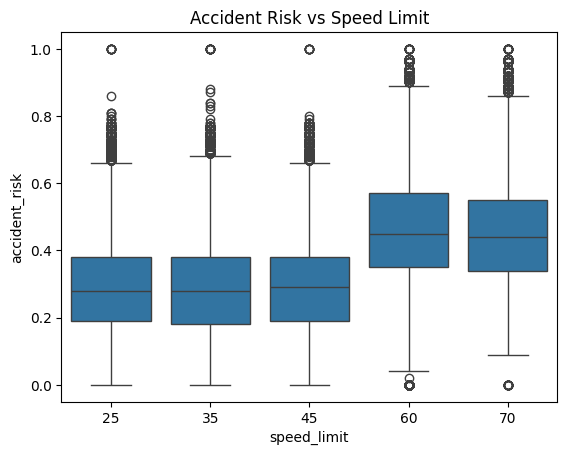

In [ ]:
target == "accident_risk"

sns.boxplot(x="speed_limit", y=target, data=df)
plt.title("Accident Risk vs Speed Limit")
plt.show()


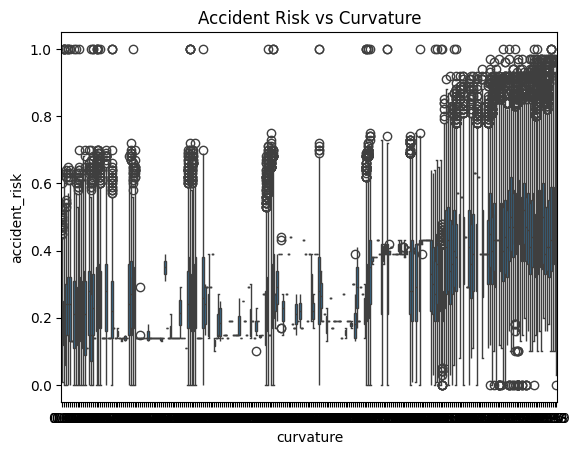

In [ ]:
target == "accident_risk"

sns.boxplot(x="curvature", y=target, data=df)
plt.title("Accident Risk vs Curvature")
plt.show()

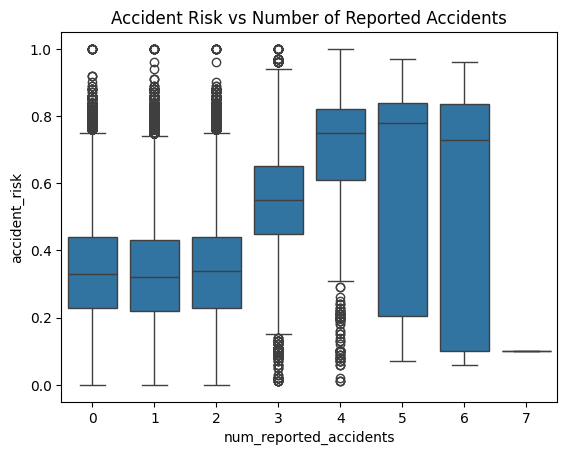

In [ ]:
target == "accident_risk"

sns.boxplot(x="num_reported_accidents", y=target, data=df)
plt.title("Accident Risk vs Number of Reported Accidents")
plt.show()

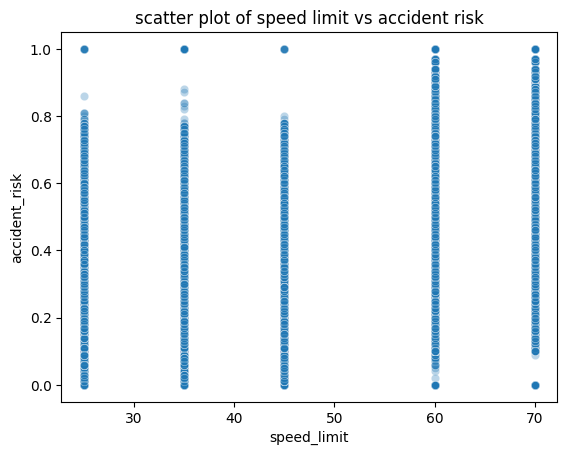

In [15]:
# lets still analyse using scatter plots
sns.scatterplot(x="speed_limit", y="accident_risk", data=df, alpha=0.3)
plt.title("scatter plot of speed limit vs accident risk")
plt.show()

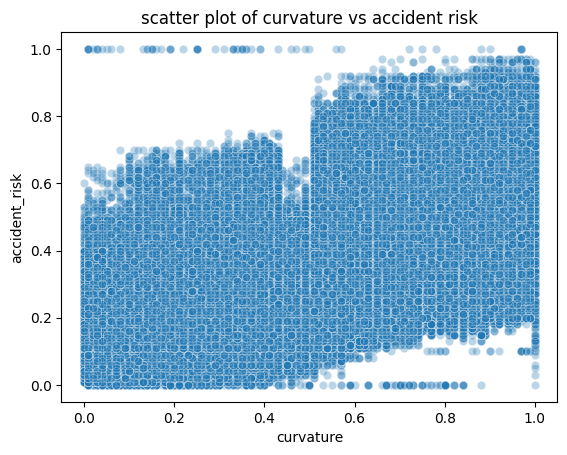

In [ ]:
# scatter plot of curevature vs accident risk
sns.scatterplot(x="curvature", y=target, data=df, alpha=0.3)
plt.title("scatter plot of curvature vs accident risk")
plt.show()

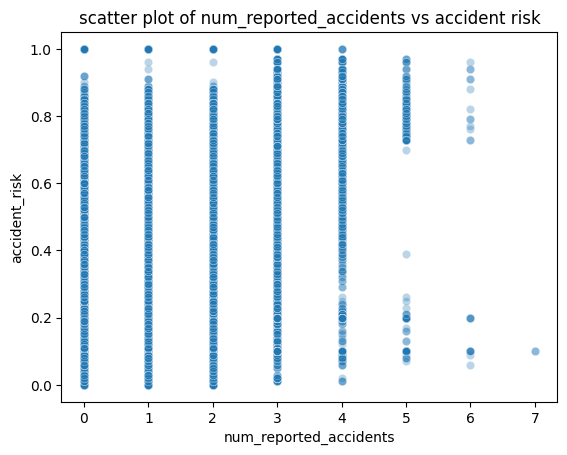

In [ ]:
# scattered plot of num_reported_accidents vs accident risk
sns.scatterplot(x="num_reported_accidents", y=target, data=df, alpha=0.3)
plt.title("scatter plot of num_reported_accidents vs accident risk")
plt.show()

In [ ]:
df[categorical_cols]

,road_type,lighting,weather,time_of_day
0,urban,daylight,rainy,afternoon
1,urban,daylight,clear,evening
2,rural,dim,clear,morning
3,highway,dim,rainy,morning
4,rural,daylight,foggy,evening
...,...,...,...,...
517749,highway,daylight,foggy,afternoon
517750,rural,daylight,rainy,morning
517751,urban,daylight,foggy,afternoon
517752,highway,night,clear,afternoon


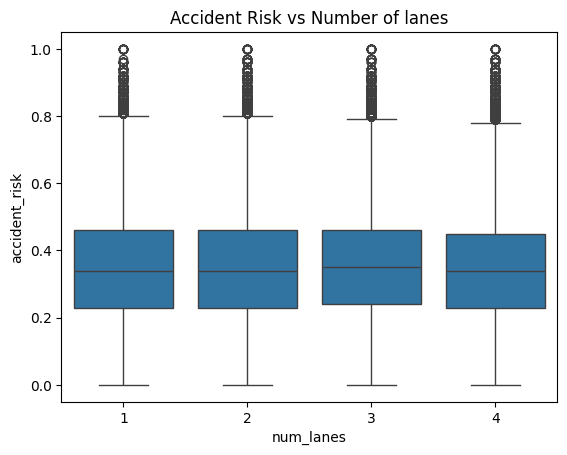

In [ ]:
# BIVARIATE ANALYSIS for categorical features vs target variable accident risk

target == "accident_risk"
sns.boxplot(x="num_lanes", y=target, data=df)
plt.title("Accident Risk vs Number of lanes")
plt.show()

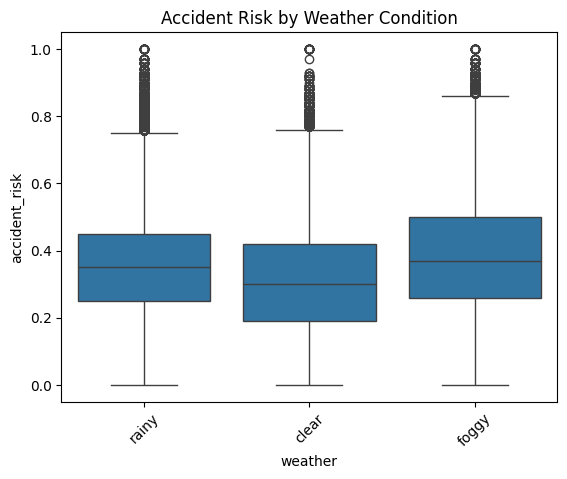

In [ ]:
sns.boxplot(x="weather", y="accident_risk", data=df)
plt.xticks(rotation=45)
plt.title("Accident Risk by Weather Condition")
plt.show()


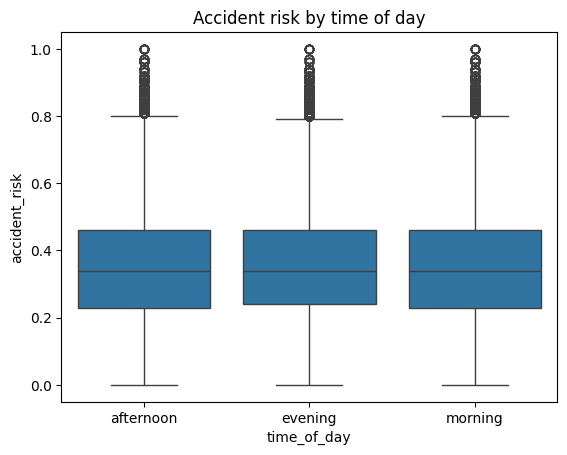

In [ ]:
sns.boxplot(x="time_of_day", y="accident_risk", data=df)
plt.title("Accident risk by time of day")
plt.show()

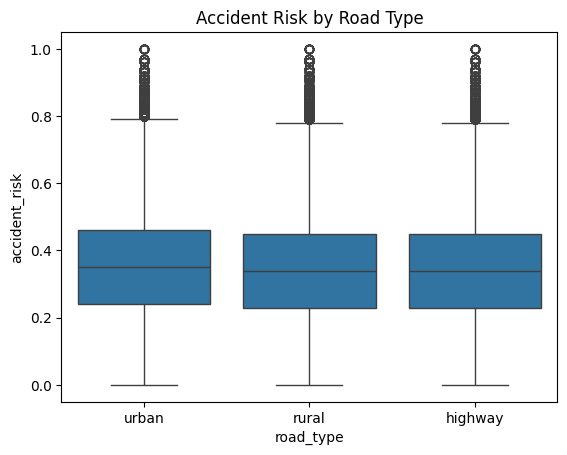

In [ ]:
sns.boxplot(x="road_type", y="accident_risk", data=df)
plt.title("Accident Risk by Road Type")
plt.show()

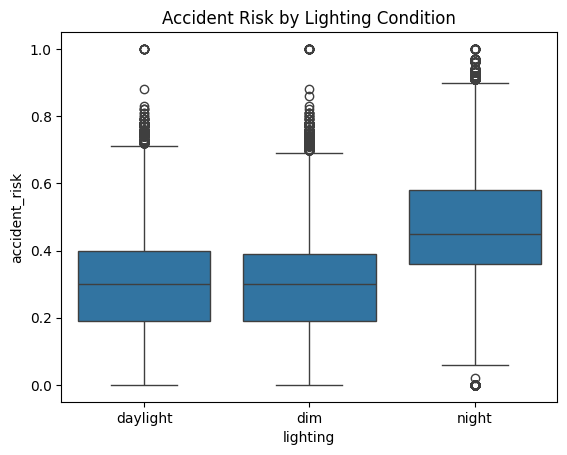

In [ ]:
sns.boxplot(x='lighting', y='accident_risk', data=df)
plt.title("Accident Risk by Lighting Condition")
plt.show()

In [ ]:
df[boolean_cols]

,road_signs_present,public_road,holiday,school_season
0,False,True,False,True
1,True,False,True,True
2,False,True,True,False
3,True,True,False,False
4,False,False,True,False
...,...,...,...,...
517749,True,True,False,False
517750,True,True,False,False
517751,False,False,False,True
517752,True,False,True,True


In [ ]:
for col in boolean_cols:
    print(f"\n{col}")
    print(df.groupby(col)['accident_risk'].mean())


road_signs_present
road_signs_present
False    0.352273
True     0.352482
Name: accident_risk, dtype: float64

public_road
public_road
False    0.347190
True     0.357518
Name: accident_risk, dtype: float64

holiday
holiday
False    0.343809
True     0.360827
Name: accident_risk, dtype: float64

school_season
school_season
False    0.352539
True     0.352214
Name: accident_risk, dtype: float64


In [ ]:
"""Correlation Analysis

Quantify numerical relationships

Detect multicollinearity

Support visual findings statistically"""

'Correlation Analysis\n\nQuantify numerical relationships\n\nDetect multicollinearity\n\nSupport visual findings statistically'

In [ ]:
df[numerical_cols].columns

Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents',
       'accident_risk'],
      dtype='object')

In [ ]:
# for correlation we use numerical columns only
num_col = [
    'num_lanes',
    "curvature",
    "speed_limit",
    "num_reported_accidents",
    "accident_risk"
]

In [ ]:
corr_matrix = df[num_col].corr()
corr_matrix

,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
num_lanes,1.000000,-0.020245,0.001194,0.017662,-0.006003
curvature,-0.020245,1.000000,0.008399,0.145034,0.543946
speed_limit,0.001194,0.008399,1.000000,0.031373,0.430898
num_reported_accidents,0.017662,0.145034,0.031373,1.000000,0.213891
accident_risk,-0.006003,0.543946,0.430898,0.213891,1.000000


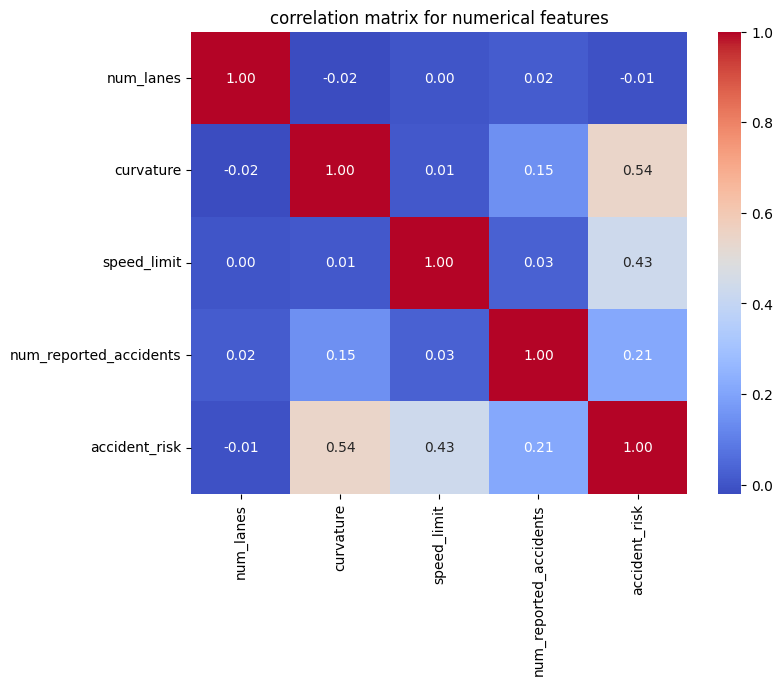

In [ ]:
# visualize corr_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt= ".2f"
)
plt.title("correlation matrix for numerical features")
plt.show()